In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
from itertools import compress

from numpy.random import normal

In [2]:
def get_samples(mu, sigma, n, iterations):
    out = normal(loc=mu, scale=sigma, size=(iterations, n))
    return out

In [91]:
# Distribution constants
mu = 1
sigma = 1

# Experiment constants
epsilon = .1
n = 3
iterations = 100000

In [92]:
X = get_samples(mu, sigma, n, iterations)

In [93]:
#X = np.sort(X, axis=1)
X = X[:, 1:] - X[:, :n-1]

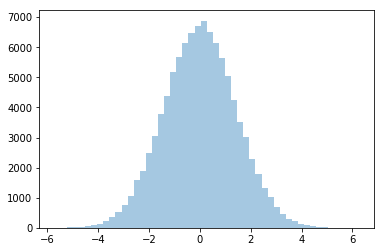

In [94]:
sns.distplot(X[:, 0], kde=False)

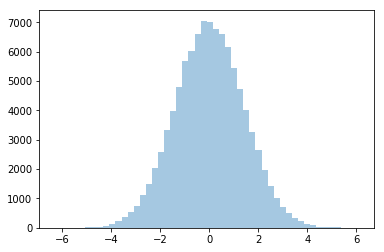

In [95]:
sns.distplot(X[:, 1], kde=False)

In [4]:
data = []

ns = np.arange(2, 26)
ss = np.linspace(0, 2, 26)[1:]

for n in tqdm(ns):
    temp = []
    
    samples = get_samples(mu, sigma, n, iterations)
    samples = np.sort(samples, axis=1)
    res = np.abs(samples[:, :n-1] - samples[:, 1:])

    for s in ss:
        probabilities = (res < s).mean(axis=1)
        probability = probabilities.mean()
        temp.append(probability)
    data.append(temp)

100%|██████████| 24/24 [00:00<00:00, 80.77it/s] 


Text(0.5,69,'Epsilon')

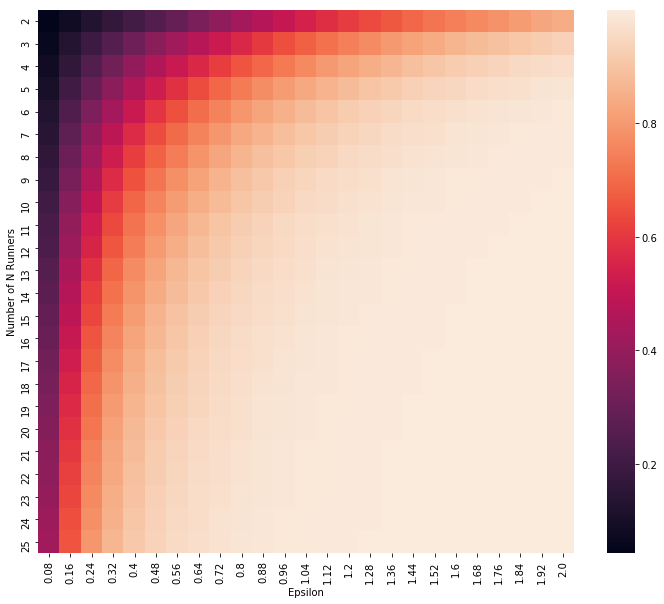

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(np.array(data), xticklabels=ss, yticklabels=ns)
ax.set_ylabel('Number of N Runners')
ax.set_xlabel('Epsilon')